# Lead conversion score prediction
A well qualified lead is gold for any business. Sales and marketing teams spend a lot their time and effort to validate the quality of lead. A 1% increase in conversion rate for leads could save thousands/millions of dollars for any organisation. It is not only about spending effort on leads that could convert but also saving effort on leads with low probability.

Machine learning and AI could help organisations in this endeavour.

The overall goal of this project is to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

### Problem Statement
An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Now, although X Education gets a lot of leads, its lead conversion rate is very poor. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.

We have to build a model to assign lead score to each of the leads. In particular, we have a ballpark of the target lead conversion rate of around 80%.

In [1]:
# Import necessary libraries
import warnings
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle
sns.set()
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [2]:
url = "https://raw.githubusercontent.com/subhendughosh91/Lead-Scoring-Logistic-Regression/master/Leads.csv"

In [3]:
# Load sample data
lead_score = pd.read_csv(url)

In [4]:
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Lets create a variable to store original rows information before any data cleaning/treatment
original_rows = lead_score.shape[0]
print("No of original rows: {0}".format(original_rows))

No of original rows: 9240


In [6]:
# Rename columns to make sense
lead_score = lead_score.rename({'Converted':'converted', 'Prospect ID':'prospectid', 'Lead Number':'leadnumber', 'Lead Origin':'leadorigin',
                                'Lead Source':'leadscource', 'Do Not Email':'donotemail', 'Do Not Call':'donotcall', 'TotalVisits':'totalvisits',
                                'Total Time Spent on Website':'totalwebsitetime', 'Page Views Per Visit':'pagepervisit', 'Last Activity':'lastactivity',
                                'Country':'country', 'Specialization':'specialization', 'How did you hear about X Education':'howheard', 'What is your current occupation':'occupation',
                                'What matters most to you in choosing a course':'coursematters', 'Search':'search', 'Magazine':'magazine', 'Newspaper Article':'newspaper',
                                'X Education Forums':'educationforums', 'Digital Advertisement':'digitalad', 'Through Recommendations':'recommendations', 'Receive More Updates About Our Courses':'receivecourseupdate',
                                'Tags':'tags', 'Lead Quality':'leadquality', 'Update me on Supply Chain Content':'updatesupplychain', 'Get updates on DM Content':'updatedmcontent',
                                'Lead Profile':'leadprofile', 'City':'city', 'Asymmetrique Activity Index':'activityindex', 'Asymmetrique Profile Index':'profileindex',
                                'Asymmetrique Activity Score':'activityscore', 'Asymmetrique Profile Score':'profilescore', 'I agree to pay the amount through cheque':'chequepayment',
                                'A free copy of Mastering The Interview':'freecopy', 'Last Notable Activity':'lastnotableactivity'}, axis=1)

In [7]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   prospectid           9240 non-null   object 
 1   leadnumber           9240 non-null   int64  
 2   leadorigin           9240 non-null   object 
 3   leadscource          9204 non-null   object 
 4   donotemail           9240 non-null   object 
 5   donotcall            9240 non-null   object 
 6   converted            9240 non-null   int64  
 7   totalvisits          9103 non-null   float64
 8   totalwebsitetime     9240 non-null   int64  
 9   pagepervisit         9103 non-null   float64
 10  lastactivity         9137 non-null   object 
 11  country              6779 non-null   object 
 12  specialization       7802 non-null   object 
 13  howheard             7033 non-null   object 
 14  occupation           6550 non-null   object 
 15  coursematters        6531 non-null   o

In [8]:
# Check for missing values and duplicates
pd.DataFrame([[lead_score.shape],
             [lead_score.isnull().sum().sum()],
             [lead_score.duplicated().sum()]],
            columns=['Application Dataset'],
            index=['Shape', 'Missingness', 'Duplicates'])

,Application Dataset
Shape,"(9240, 37)"
Missingness,41039
Duplicates,0


In [9]:
# There are many columns with value "select" this can be converted to null values
lead_score[lead_score =='Select'].count()

prospectid                0
leadnumber                0
leadorigin                0
leadscource               0
donotemail                0
donotcall                 0
converted                 0
totalvisits               0
totalwebsitetime          0
pagepervisit              0
lastactivity              0
country                   0
specialization         1942
howheard               5043
occupation                0
coursematters             0
search                    0
magazine                  0
newspaper                 0
educationforums           0
Newspaper                 0
digitalad                 0
recommendations           0
receivecourseupdate       0
tags                      0
leadquality               0
updatesupplychain         0
updatedmcontent           0
leadprofile            4146
city                   2249
activityindex             0
profileindex              0
activityscore             0
profilescore              0
chequepayment             0
freecopy            

In [10]:
# Convert "Select" to missing values
lead_score.replace("Select", np.NaN, inplace=True)

In [11]:
percent_missing = lead_score.isnull().sum() * 100 / len(lead_score)
missing_value_df = pd.DataFrame({'column_name': lead_score.columns,
                                 'percent_missing': percent_missing})

In [12]:
# Output the list of variables with more than 30% mssing values
missing_data_cols = list(missing_value_df[missing_value_df['percent_missing'] > 30]['column_name'])
missing_data_cols

['specialization',
 'howheard',
 'tags',
 'leadquality',
 'leadprofile',
 'city',
 'activityindex',
 'profileindex',
 'activityscore',
 'profilescore']

# Data Preprocessing Phase

In [13]:
# lets drop columns with more than 30% missing values
print('number of columns before dropping high percentage of missing values columns are: {0}'.format(lead_score.shape[1]))
lead_score.drop(columns=missing_data_cols, inplace=True)
print('number of columns after dropping high percentage of missing values columns are: {0}'.format(lead_score.shape[1]))

number of columns before dropping high percentage of missing values columns are: 37
number of columns after dropping high percentage of missing values columns are: 27


In [14]:
# Drop unecessary columns
lead_score.drop(['prospectid', 'leadnumber'], axis=1, inplace=True)

In [15]:
lead_score.head()

,leadorigin,leadscource,donotemail,donotcall,converted,totalvisits,totalwebsitetime,pagepervisit,lastactivity,country,occupation,coursematters,search,magazine,newspaper,educationforums,Newspaper,digitalad,recommendations,receivecourseupdate,updatesupplychain,updatedmcontent,chequepayment,freecopy,lastnotableactivity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [16]:
# Class balance check
lead_score['converted'].value_counts(normalize=True)

0    0.61461
1    0.38539
Name: converted, dtype: float64

### Exploratory Data Analysis

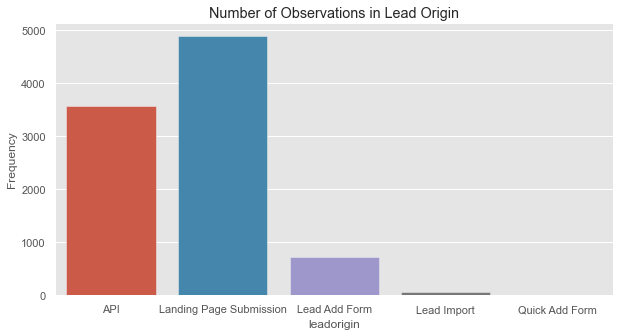

In [17]:
# leadorigin
plt.figure(figsize=(10, 5))
sns.countplot(lead_score['leadorigin'])
plt.title('Number of Observations in Lead Origin')
plt.xlabel('leadorigin')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Leadsource value count
lead_score['leadscource'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: leadscource, dtype: int64

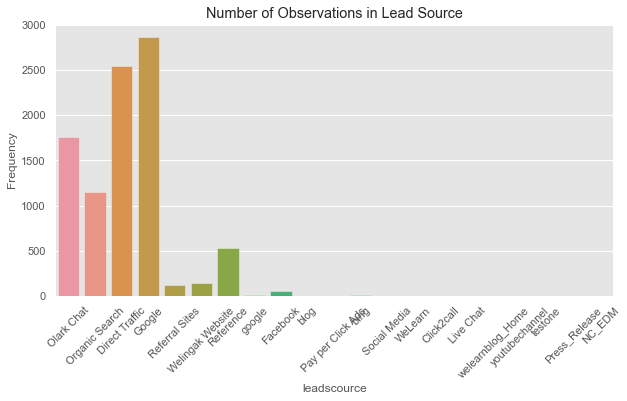

In [19]:
# leadscource
plt.figure(figsize=(10, 5))
sns.countplot(lead_score['leadscource'])
plt.title('Number of Observations in Lead Source')
plt.xlabel('leadscource')
plt.ylabel('Frequency')
plt.xticks(rotation=45);

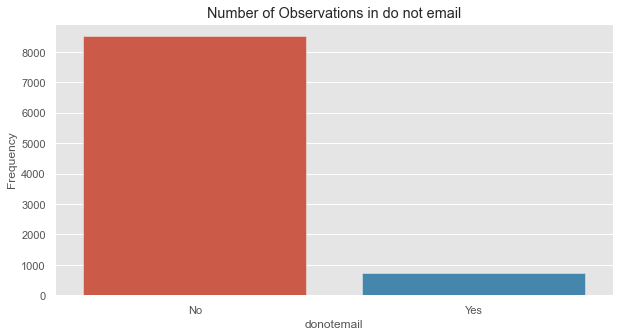

In [20]:
# donotemail
plt.figure(figsize=(10, 5))
sns.countplot(lead_score['donotemail'])
plt.title('Number of Observations in do not email')
plt.xlabel('donotemail')
plt.ylabel('Frequency')
plt.show()

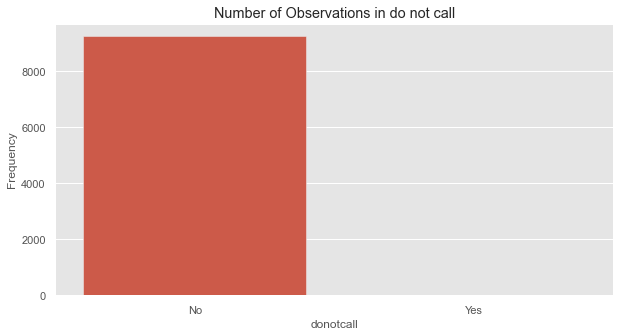

In [21]:
# donotcall
plt.figure(figsize=(10, 5))
sns.countplot(lead_score['donotcall'])
plt.title('Number of Observations in do not call')
plt.xlabel('donotcall')
plt.ylabel('Frequency')
plt.show()

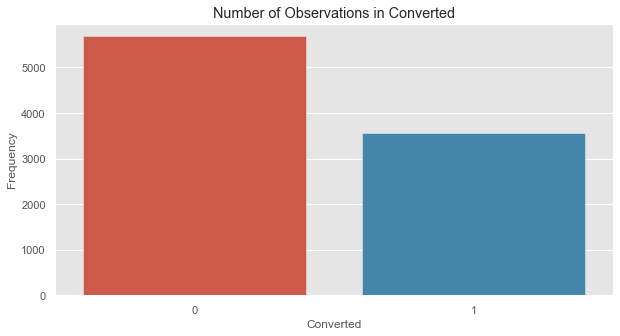

In [22]:
# Converted
plt.figure(figsize=(10, 5))
sns.countplot(lead_score['converted'])
plt.title('Number of Observations in Converted')
plt.xlabel('Converted')
plt.ylabel('Frequency')
plt.show()

In [23]:
lead_score['totalvisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: totalvisits, dtype: int64

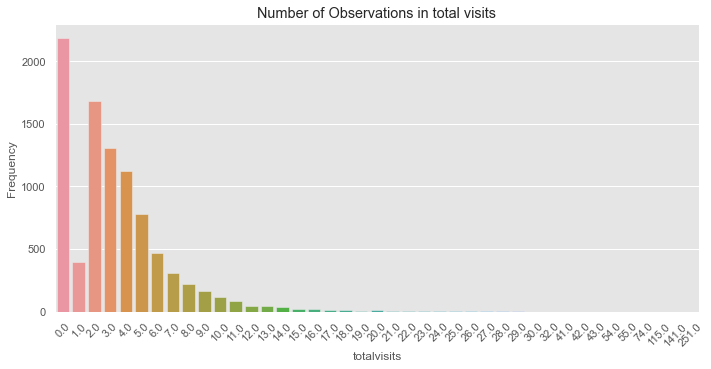

In [24]:
# totalvisits
plt.figure(figsize=(10, 5))
sns.countplot(lead_score['totalvisits'])
plt.title('Number of Observations in total visits')
plt.xlabel('totalvisits')
plt.ylabel('Frequency')
plt.tight_layout()
plt.xticks(rotation=45);
plt.show()

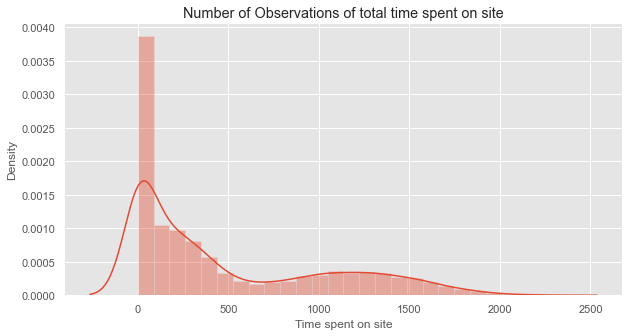

In [25]:
# totalwebsitetime
plt.figure(figsize=(10, 5))
sns.distplot(lead_score['totalwebsitetime'])
plt.title('Number of Observations of total time spent on site')
plt.xlabel('Time spent on site')
#plt.ylabel('Frequency')
plt.show()

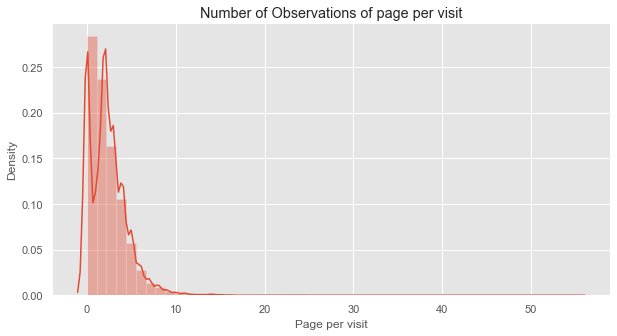

In [26]:
# pagepervisit
plt.figure(figsize=(10, 5))
sns.distplot(lead_score['pagepervisit'])
plt.title('Number of Observations of page per visit')
plt.xlabel('Page per visit')
#plt.ylabel('Frequency')
plt.show()

In [27]:
# lastactivity value count
lead_score['lastactivity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: lastactivity, dtype: int64

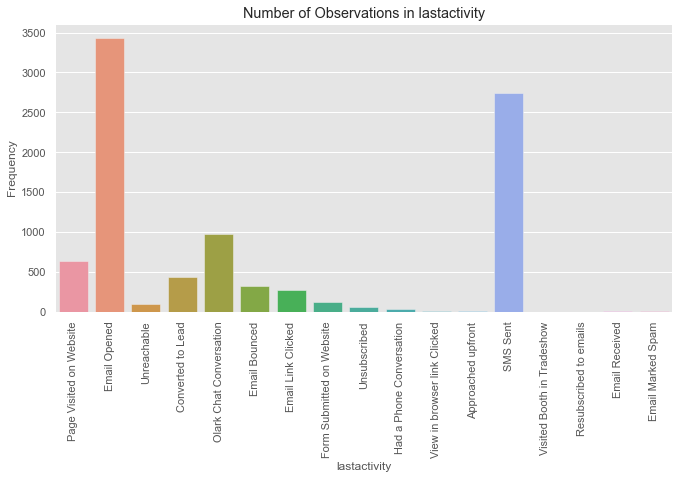

In [28]:
# lastactivity
plt.figure(figsize=(10, 5))
sns.countplot(lead_score['lastactivity'])
plt.title('Number of Observations in lastactivity')
plt.xlabel('lastactivity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.xticks(rotation=90);
plt.show()

In [29]:
# country value counts
lead_score['country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

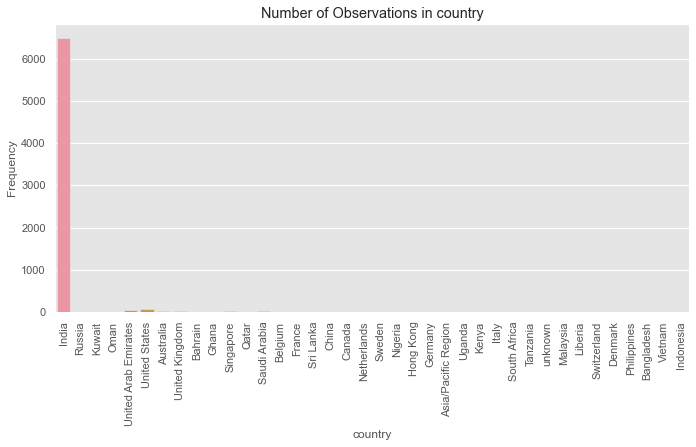

In [30]:
# country
plt.figure(figsize=(10, 5))
sns.countplot(lead_score['country'])
plt.title('Number of Observations in country')
plt.xlabel('country')
plt.ylabel('Frequency')
plt.tight_layout()
plt.xticks(rotation=90);
plt.show()

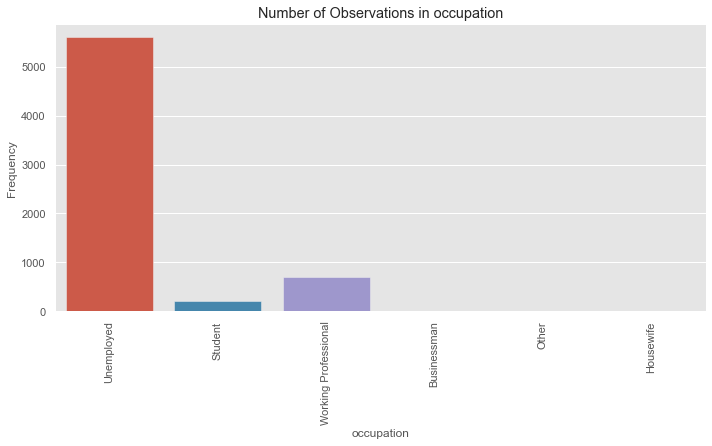

In [31]:
# country
plt.figure(figsize=(10, 5))
sns.countplot(lead_score['occupation'])
plt.title('Number of Observations in occupation')
plt.xlabel('occupation')
plt.ylabel('Frequency')
plt.tight_layout()
plt.xticks(rotation=90);
plt.show()

In [32]:
# Converted value counts
lead_score['coursematters'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: coursematters, dtype: int64

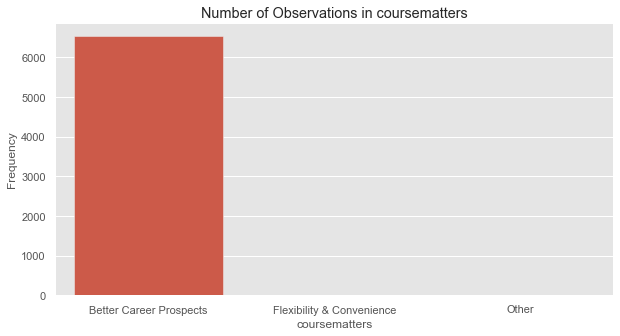

In [33]:
# Converted
plt.figure(figsize=(10, 5))
sns.countplot(lead_score['coursematters'])
plt.title('Number of Observations in coursematters')
plt.xlabel('coursematters')
plt.ylabel('Frequency')
plt.show()

In [34]:
# lastnotableactivity value counts
lead_score['lastnotableactivity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: lastnotableactivity, dtype: int64

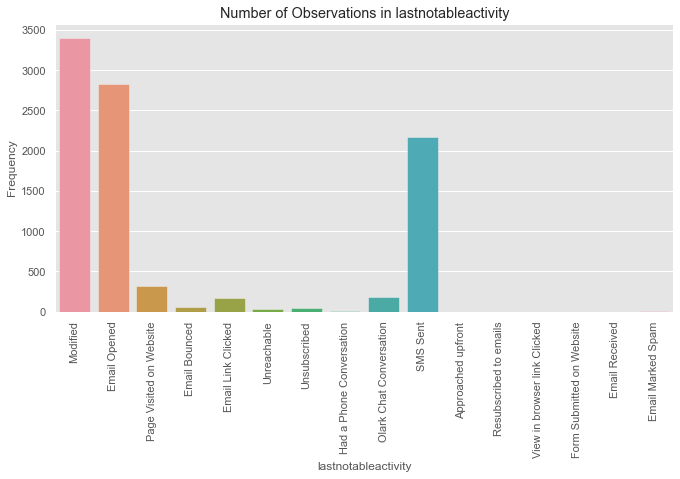

In [35]:
# lastnotableactivity
plt.figure(figsize=(10, 5))
sns.countplot(lead_score['lastnotableactivity'])
plt.title('Number of Observations in lastnotableactivity')
plt.xlabel('lastnotableactivity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.xticks(rotation=90);
plt.show()

In [36]:
# Start at column 12 and at freecopy
yes_no = lead_score[lead_score.columns[12:-1]]
yes_no.head()

,search,magazine,newspaper,educationforums,Newspaper,digitalad,recommendations,receivecourseupdate,updatesupplychain,updatedmcontent,chequepayment,freecopy
0,No,No,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No,No,No,Yes
3,No,No,No,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,No,No,No,No,No,No


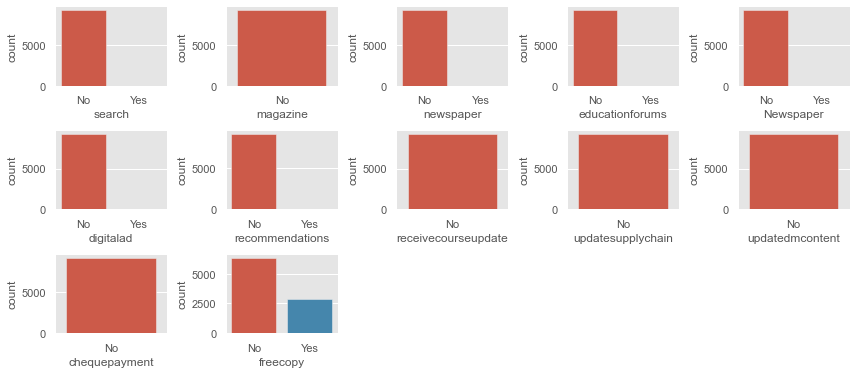

In [37]:
# univariate analysis
fig=plt.subplots(figsize=(12, 10))

for i, feature in enumerate(yes_no.columns):
    plt.subplot(6, 5, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(lead_score[feature])
    plt.tight_layout()

In [38]:
def splitdataset(df):
    """Function to split the dataset"""
    
    # Shuffle our data
    df = shuffle(df, random_state=42)
  
    # Separating the target variable
    X = df.drop(['converted'], axis=1)
    y = df['converted']
  
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.2, random_state = 42, stratify=y)
      
    return X_train, X_test, y_train, y_test

In [39]:
X_train, X_test, y_train, y_test = splitdataset(lead_score)

In [40]:
# Preprocess the sparse variables
lastnotableactivity = lead_score['lastnotableactivity'].value_counts(ascending=False)
country = lead_score['country'].value_counts(ascending=False)
lastactivity = lead_score['lastactivity'].value_counts(ascending=False)
totalvisits = lead_score['totalvisits'].value_counts(ascending=False)
leadscource = lead_score['leadscource'].value_counts(ascending=False)

In [41]:
lastnotableactivity_lessthan100 = lastnotableactivity[lastnotableactivity <= 100]
country_lessthan_15 = country[country <= 15]
lastactivity_lessthan100 = lastactivity[lastactivity <= 100]
totalvisits_lessthan100 = totalvisits[totalvisits <= 100]
leadscource_lessthan100 = leadscource[leadscource < 100]

In [42]:
# Transform values in X_train
X_train['lastnotableactivity'] = X_train['lastnotableactivity'].apply(lambda x: 'others' if x in lastnotableactivity_lessthan100 else x)
X_train['country'] = X_train['country'].apply(lambda x: 'others' if x in country_lessthan_15 else x)
X_train['lastactivity'] = X_train['lastactivity'].apply(lambda x: 'others' if x in lastactivity_lessthan100 else x)
X_train['totalvisits'] = X_train['totalvisits'].apply(lambda x: 11.0 if x in totalvisits_lessthan100 else x)
X_train['leadscource'] = X_train['leadscource'].apply(lambda x: 'others' if x in leadscource_lessthan100 else x)

In [43]:
# Transform values in X_train
X_test['lastnotableactivity'] = X_test['lastnotableactivity'].apply(lambda x: 'others' if x in lastnotableactivity_lessthan100 else x)
X_test['country'] = X_test['country'].apply(lambda x: 'others' if x in country_lessthan_15 else x)
X_test['lastactivity'] = X_test['lastactivity'].apply(lambda x: 'others' if x in lastactivity_lessthan100 else x)
X_test['totalvisits'] = X_test['totalvisits'].apply(lambda x: 11.0 if x in totalvisits_lessthan100 else x)
X_test['leadscource'] = X_test['leadscource'].apply(lambda x: 'others' if x in leadscource_lessthan100 else x)

In [44]:
X_test['totalvisits'].dtypes

dtype('float64')

In [45]:
# Split numerical and categorical features
num_cols = [col for col in X_train if X_train[col].dtypes != 'O']
cat_cols = [col for col in X_train if X_train[col].dtypes == 'O']
print(num_cols)
print(cat_cols)

['totalvisits', 'totalwebsitetime', 'pagepervisit']
['leadorigin', 'leadscource', 'donotemail', 'donotcall', 'lastactivity', 'country', 'occupation', 'coursematters', 'search', 'magazine', 'newspaper', 'educationforums', 'Newspaper', 'digitalad', 'recommendations', 'receivecourseupdate', 'updatesupplychain', 'updatedmcontent', 'chequepayment', 'freecopy', 'lastnotableactivity']


In [46]:
X_train[num_cols].isnull().sum()

totalvisits         111
totalwebsitetime      0
pagepervisit        111
dtype: int64

In [47]:
X_train[cat_cols].isnull().sum()

leadorigin                0
leadscource              25
donotemail                0
donotcall                 0
lastactivity             82
country                1975
occupation             2120
coursematters          2135
search                    0
magazine                  0
newspaper                 0
educationforums           0
Newspaper                 0
digitalad                 0
recommendations           0
receivecourseupdate       0
updatesupplychain         0
updatedmcontent           0
chequepayment             0
freecopy                  0
lastnotableactivity       0
dtype: int64

##### Pipeline and ColumnTransformer

In [48]:
# Pipeline
pp_num = Pipeline([
    ('num_imp', SimpleImputer(strategy='median')),
    ('standardscaler_num', StandardScaler())
])

pp_cat = Pipeline([
    ('cat_imp', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe_cat', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

In [49]:
ct = ColumnTransformer([
    ('pp_num', pp_num, num_cols),
    ('pp_cat', pp_cat, cat_cols)
])

In [50]:
# Transform X_train
Xt_trans = ct.fit_transform(X_train)

In [51]:
# Extract column names from pipeline
ct.named_transformers_['pp_cat'][1].get_feature_names_out()

array(['x0_API', 'x0_Landing Page Submission', 'x0_Lead Add Form',
       'x0_Lead Import', 'x1_Direct Traffic', 'x1_Google',
       'x1_Olark Chat', 'x1_Organic Search', 'x1_Reference',
       'x1_Referral Sites', 'x1_Welingak Website', 'x1_missing',
       'x1_others', 'x2_No', 'x2_Yes', 'x3_No', 'x3_Yes',
       'x4_Converted to Lead', 'x4_Email Bounced',
       'x4_Email Link Clicked', 'x4_Email Opened',
       'x4_Form Submitted on Website', 'x4_Olark Chat Conversation',
       'x4_Page Visited on Website', 'x4_SMS Sent', 'x4_missing',
       'x4_others', 'x5_India', 'x5_Saudi Arabia', 'x5_Singapore',
       'x5_United Arab Emirates', 'x5_United States', 'x5_missing',
       'x5_others', 'x6_Businessman', 'x6_Housewife', 'x6_Other',
       'x6_Student', 'x6_Unemployed', 'x6_Working Professional',
       'x6_missing', 'x7_Better Career Prospects',
       'x7_Flexibility & Convenience', 'x7_Other', 'x7_missing', 'x8_No',
       'x8_Yes', 'x9_No', 'x10_No', 'x10_Yes', 'x11_No', 'x11_

In [52]:
column_names = (num_cols + ct.named_transformers_['pp_cat'][1].get_feature_names_out().tolist())

In [53]:
# Transformed X_train
transformed_train = pd.DataFrame(Xt_trans, columns=column_names)
transformed_train.head()

,totalvisits,totalwebsitetime,pagepervisit,x0_API,x0_Landing Page Submission,x0_Lead Add Form,x0_Lead Import,x1_Direct Traffic,x1_Google,x1_Olark Chat,x1_Organic Search,x1_Reference,x1_Referral Sites,x1_Welingak Website,x1_missing,x1_others,x2_No,x2_Yes,x3_No,x3_Yes,x4_Converted to Lead,x4_Email Bounced,x4_Email Link Clicked,x4_Email Opened,x4_Form Submitted on Website,x4_Olark Chat Conversation,x4_Page Visited on Website,x4_SMS Sent,x4_missing,x4_others,x5_India,x5_Saudi Arabia,x5_Singapore,x5_United Arab Emirates,x5_United States,x5_missing,x5_others,x6_Businessman,x6_Housewife,x6_Other,x6_Student,x6_Unemployed,x6_Working Professional,x6_missing,x7_Better Career Prospects,x7_Flexibility & Convenience,x7_Other,x7_missing,x8_No,x8_Yes,x9_No,x10_No,x10_Yes,x11_No,x11_Yes,x12_No,x12_Yes,x13_No,x13_Yes,x14_No,x14_Yes,x15_No,x16_No,x17_No,x18_No,x19_No,x19_Yes,x20_Email Link Clicked,x20_Email Opened,x20_Modified,x20_Olark Chat Conversation,x20_Page Visited on Website,x20_SMS Sent,x20_others
0,0.275976,0.333584,0.775631,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.122493,-0.884091,-1.096189,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2.723297,2.168337,0.930056,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.625594,-0.468433,1.243585,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.423258,-0.838314,-0.160279,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [54]:
# Transform X_test
Xtx = ct.transform(X_test)
transformed_test = pd.DataFrame(Xtx, columns=column_names).head()
transformed_test.head()

,totalvisits,totalwebsitetime,pagepervisit,x0_API,x0_Landing Page Submission,x0_Lead Add Form,x0_Lead Import,x1_Direct Traffic,x1_Google,x1_Olark Chat,x1_Organic Search,x1_Reference,x1_Referral Sites,x1_Welingak Website,x1_missing,x1_others,x2_No,x2_Yes,x3_No,x3_Yes,x4_Converted to Lead,x4_Email Bounced,x4_Email Link Clicked,x4_Email Opened,x4_Form Submitted on Website,x4_Olark Chat Conversation,x4_Page Visited on Website,x4_SMS Sent,x4_missing,x4_others,x5_India,x5_Saudi Arabia,x5_Singapore,x5_United Arab Emirates,x5_United States,x5_missing,x5_others,x6_Businessman,x6_Housewife,x6_Other,x6_Student,x6_Unemployed,x6_Working Professional,x6_missing,x7_Better Career Prospects,x7_Flexibility & Convenience,x7_Other,x7_missing,x8_No,x8_Yes,x9_No,x10_No,x10_Yes,x11_No,x11_Yes,x12_No,x12_Yes,x13_No,x13_Yes,x14_No,x14_Yes,x15_No,x16_No,x17_No,x18_No,x19_No,x19_Yes,x20_Email Link Clicked,x20_Email Opened,x20_Modified,x20_Olark Chat Conversation,x20_Page Visited on Website,x20_SMS Sent,x20_others
0,-1.122493,-0.884091,-1.096189,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-1.122493,-0.884091,-1.096189,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.073641,-0.854793,-0.628234,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.625594,0.079063,-0.314704,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.275976,-0.732110,0.775631,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [55]:
print(transformed_train.shape)
print(transformed_test.shape)

(7392, 74)
(5, 74)


##### Feature Selection RFECV

Optimal number of features: 19


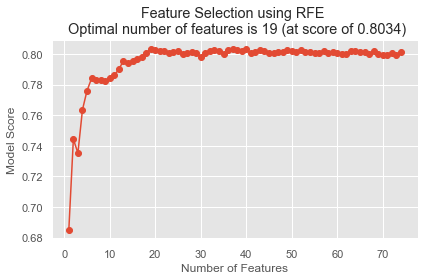

In [56]:
# Feature Selection
clf = RandomForestClassifier(random_state=42)
feature_selector = RFECV(clf)

fit = feature_selector.fit(transformed_train, y_train)

optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

transformed_train = transformed_train.loc[:, feature_selector.get_support()]
transformed_test = transformed_test.loc[:, feature_selector.get_support()]

plt.plot(range(1, len(fit.cv_results_['mean_test_score']) + 1), fit.cv_results_['mean_test_score'], marker = "o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.cv_results_['mean_test_score']),4)})")
plt.tight_layout()
plt.show()

In [57]:
# Check selected features
transformed_train.head()

,totalvisits,totalwebsitetime,pagepervisit,x0_API,x0_Lead Add Form,x1_Direct Traffic,x1_Google,x1_Reference,x2_Yes,x4_Email Opened,x4_SMS Sent,x6_Unemployed,x6_Working Professional,x6_missing,x7_Better Career Prospects,x7_missing,x19_Yes,x20_Modified,x20_SMS Sent
0,0.275976,0.333584,0.775631,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.122493,-0.884091,-1.096189,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,2.723297,2.168337,0.930056,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.625594,-0.468433,1.243585,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.423258,-0.838314,-0.160279,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


# Modelling Phase

In [58]:
# Modelling Logistic Regression
pipe_final = Pipeline([
    ('ct_step', ct),
    ('feature_selection', RFECV(RandomForestClassifier(random_state=42))),
    ('model_lr', LogisticRegression(random_state=42))
])

In [59]:
# Train our model
pipe_final.fit(X_train, y_train)

Pipeline(steps=[('ct_step',
                 ColumnTransformer(transformers=[('pp_num',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler_num',
                                                                   StandardScaler())]),
                                                  ['totalvisits',
                                                   'totalwebsitetime',
                                                   'pagepervisit']),
                                                 ('pp_cat',
                                                  Pipeline(steps=[('cat_imp',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
    

# Evaluation Phase

In [66]:
# Assess model performance
y_pred_lr = pipe_final.predict(X_test)
y_pred_proba_lr = pipe_final.predict_proba(X_test)[:,1]

In [79]:
# Check for overfitting
y_pred_training = pipe_final.predict(X_train)
accuracy_score(y_train, y_pred_training)

0.8158820346320347

In [68]:
# Accuracy score (The number of correct classification out of all attempted classification)
accuracy_score(y_test, y_pred_lr)

0.8116883116883117

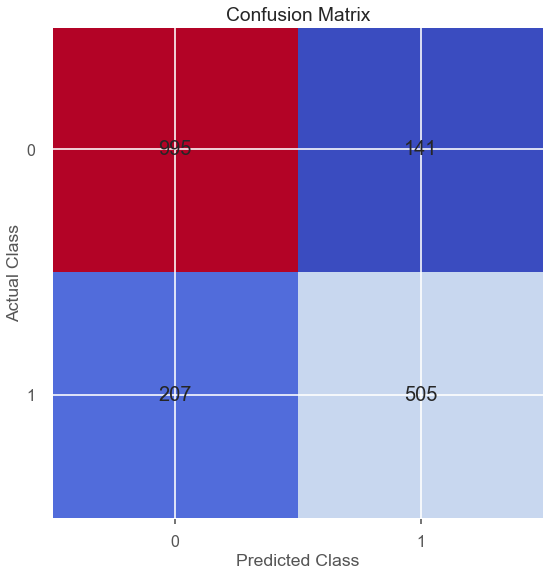

In [70]:
# Confusion Matrix 
conf_mat = confusion_matrix(y_test, y_pred_lr)
plt.style.use("seaborn-poster")
plt.matshow(conf_mat, cmap='coolwarm')
plt.gca().xaxis.tick_bottom()
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
for (i, j), corr_value in np.ndenumerate(conf_mat):
    plt.text(j, i, corr_value, ha='center', va='center', fontsize=20)
plt.show()

In [72]:
# Precision (Of all observations that were predicted, many were actually positive)
precision_score(y_test, y_pred_lr)

0.781733746130031

In [73]:
# Recall (Of all positive observations, how many did we predict as positive)
recall_score(y_test, y_pred_lr)

0.7092696629213483

In [74]:
# FI-Score (The harmonic mean of precision and recall)
f1_score(y_test, y_pred_lr)

0.7437407952871871

### Finding the Optimal threshold

In [75]:
thresholds = np.arange(0, 1, 0.01)

precision_scores = []
recall_scores = []
f1_scores = []

for threshold in thresholds:
    pred_class = (y_pred_proba_lr >= threshold) * 1
    
    precision = precision_score(y_test, pred_class, zero_division = 0)
    precision_scores.append(precision)
    
    recall = recall_score(y_test, pred_class)
    recall_scores.append(recall)

    f1 = f1_score(y_test, pred_class)
    f1_scores.append(f1)

max_f1 = max(f1_scores)
max_f1_idx = f1_scores.index(max_f1)

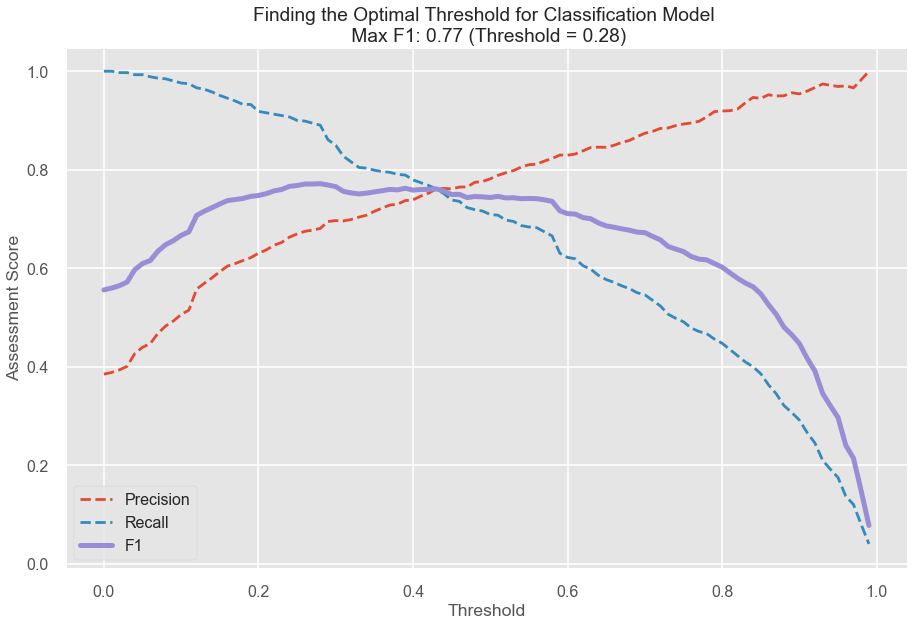

In [76]:
plt.style.use("seaborn-poster")
plt.plot(thresholds, precision_scores, label='Precision', linestyle='--')
plt.plot(thresholds, recall_scores, label='Recall', linestyle='--')
plt.plot(thresholds, f1_scores, label='F1', linewidth=5)
plt.title(f"Finding the Optimal Threshold for Classification Model \n Max F1: {round(max_f1, 2)} (Threshold = {round(thresholds[max_f1_idx], 2)})")
plt.xlabel("Threshold")
plt.ylabel("Assessment Score")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

### Apply Threshold to our data

In [77]:
optimal_threshold = 0.28
y_pred_class_opt_thresh = (y_pred_proba_lr >= optimal_threshold) * 1

In [78]:
y_pred_class_opt_thresh

array([1, 1, 0, ..., 1, 0, 1])